## Airline Passenger Volume

This model predicts the volume of airline passengers using historical data from January 1949 to December 1960, with a total of 144 observations. Even with this modest data set, surprisingly accurate predictions are possible.

This is time series data, which is well suited to Long-Short Term Memory ([LSTM](https://en.wikipedia.org/wiki/Long_short-term_memory)).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


## Training Data

The data is collected monthly, in units of 1000s of international passengers. The number of passengers expectedly increases with time. The data also appears cyclical, maybe due to holiday travel. LSTMs are capable of learning both features.

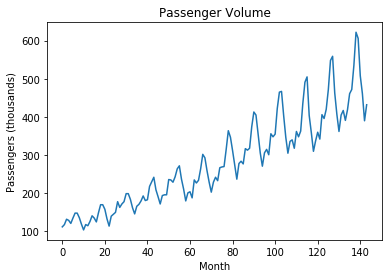

In [2]:
dataframe = pd.read_csv('data/airline-passengers.csv', usecols=[1], engine='python')
raw_data = dataframe.values.astype('float32')

plt.plot(raw_data)
plt.title('Passenger Volume')
plt.ylabel('Passengers (thousands)')
plt.xlabel('Month')
plt.show()

In [11]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(raw_data)

train1D = dataset.reshape((dataset.shape[0]))

## Data Preparation

In [188]:
seq_length = 12
dataX = []
dataY = []
for i in range(0, len(train1D) - seq_length, 1):
    seq_in = train1D[i:i + seq_length]
    seq_out = train1D[i + seq_length]
    dataX.append(seq_in)
    dataY.append(seq_out)
n_patterns = len(dataX)
print("Number of patterns: ", n_patterns)

# Reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
Y = np.asarray(dataY)

Number of patterns:  132


## Define Model

A simple model that illustrates the principle.

In [189]:
# Define and fit the LSTM network
model = Sequential()
model.add(LSTM(12, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 12)                672       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 13        
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [190]:
history = model.fit(X, Y, epochs=40, batch_size=1, verbose=2)

Epoch 1/40
 - 2s - loss: 0.0629
Epoch 2/40
 - 1s - loss: 0.0157
Epoch 3/40
 - 1s - loss: 0.0108
Epoch 4/40
 - 1s - loss: 0.0113
Epoch 5/40
 - 1s - loss: 0.0103
Epoch 6/40
 - 1s - loss: 0.0100
Epoch 7/40
 - 1s - loss: 0.0102
Epoch 8/40
 - 1s - loss: 0.0087
Epoch 9/40
 - 1s - loss: 0.0098
Epoch 10/40
 - 1s - loss: 0.0088
Epoch 11/40
 - 1s - loss: 0.0086
Epoch 12/40
 - 1s - loss: 0.0084
Epoch 13/40
 - 1s - loss: 0.0078
Epoch 14/40
 - 1s - loss: 0.0083
Epoch 15/40
 - 1s - loss: 0.0076
Epoch 16/40
 - 1s - loss: 0.0078
Epoch 17/40
 - 1s - loss: 0.0076
Epoch 18/40
 - 1s - loss: 0.0073
Epoch 19/40
 - 1s - loss: 0.0070
Epoch 20/40
 - 1s - loss: 0.0075
Epoch 21/40
 - 1s - loss: 0.0068
Epoch 22/40
 - 1s - loss: 0.0071
Epoch 23/40
 - 1s - loss: 0.0067
Epoch 24/40
 - 1s - loss: 0.0063
Epoch 25/40
 - 1s - loss: 0.0060
Epoch 26/40
 - 1s - loss: 0.0059
Epoch 27/40
 - 1s - loss: 0.0055
Epoch 28/40
 - 1s - loss: 0.0060
Epoch 29/40
 - 1s - loss: 0.0057
Epoch 30/40
 - 1s - loss: 0.0052
Epoch 31/40
 - 1s -

## Model Loss

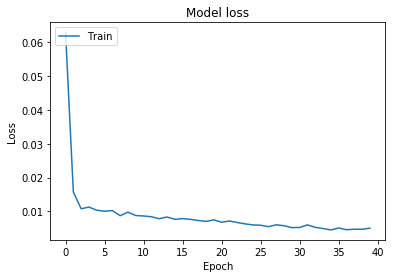

Minimum loss: 0.005


In [191]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
print("Minimum loss: %.3f" % history.history['loss'][-1])

## Prediction

In [192]:
predictions = scaler.inverse_transform(model.predict(X))

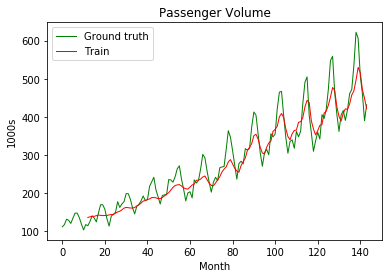

In [193]:
look_back = seq_length

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(predictions)+look_back, :] = predictions

# Plot ground truth and predictions
plt.plot(scaler.inverse_transform(dataset), color='green', linewidth=1.0)
plt.plot(trainPredictPlot, color='red', linewidth=1.0)
plt.title('Passenger Volume')
plt.ylabel('1000s')
plt.xlabel('Month')
plt.legend(['Ground truth', 'Train', 'Test'], loc='upper left')
plt.show()

## Generate New Values

Start with the first four values, then predict N values one by one.

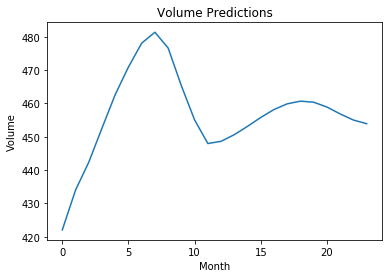

In [194]:
nextX = X[-1:]
yValues = []
for i in range(24):
    nextY = model.predict(nextX)
    nextX = np.roll(nextX, -1)
    nextX[-1][-1][-1] = nextY[-1][0]
    yValues.append(scaler.inverse_transform(nextY)[-1][0])

plt.plot(yValues)
plt.title('Volume Predictions')
plt.ylabel('Volume')
plt.xlabel('Month')
plt.show()